Com a base de dados “salários” (cps91.txt) obter os seguintes resultados:

a) Elaborar  plotar o histograma e o boxplot da variável `educ`.

b) Elaborar a tabela de distribuição de frequências da variável `earns` (rendimento da mulher);

c) Elaborar e plotar o histograma da variável `earns`;

d) Para a variável "earns", calcular os seguintes indicadores:

        - média;
        - mediana;
        - moda;
        - variância;
        - desvio padrão;
        - CV–Coeficiente de Variação;
        - Quartis;
        - distância interquartílica;
        - percentis.

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

In [216]:
# A fine addition of handcrafted statistics tools

# média
mean = lambda vector: sum(vector)/ len(vector)

# mediana
median = lambda v: (len(v) - 1) // 2

# moda
mode = lambda vector: max(set(vector), key=vector.count)

# alcanc
srange = lambda vector: max(vector) - min(vector)

# variância
variance = lambda vector: sum((i - mean(vector))**2 for i in vector) / len(vector)

# desvio padrão
std_deviation = lambda vector: variance(vector) ** .5

# erro padrão
std_error = lambda vector: std_deviation(vector) / (len(vector) ** .5)

# Absolute frequency
fi = lambda x, tgt_n: len([i for i in x if i == tgt_n])

# Relative frequency
fr = lambda x, tgt_n: fi(x, tgt_n) / len(x)

# Percentual(n)
fperc = lambda x, tgt_n: fr(x, tgt_n) * 100

# Cummulated frequency
fac = lambda x: sum(x)

# variation coeficient (CV)
variance_coef = lambda vec: std_deviation(vec) / mean(vec)

# número de classes
k = lambda x: int(sqrt(len(x)))

# ampitude total
at = lambda x: max(x) - min(x)

# amplitude da classe
ac = lambda x: at(x) / k(x)

# Ponto médio das classes
xi = lambda vec: (min(vec) + max(vec)) / 2

# quantiles
def get_q1(vec):
    return (len(vec)+1) // 4

def get_q2(vec):
    return get_q1(vec) * 2

def get_q3(vec):
    return get_q1(vec) * 3

# Percentiles
def percentiles(vec):
    results = {}
    vec = sorted(vec)
    for i in range(10, 100, 10):
        index = i * ((len(vec) + 1) // 100)
        results[i] = vec[index]
    return results

In [207]:
df = pd.read_csv('datasets/cps91.txt', sep=" ")
df.head()

,husage,husunion,husearns,huseduc,husblck,hushisp,hushrs,kidge6,earns,age,...,union,faminc,husexp,exper,kidlt6,hours,nwifeinc,inlf,hrwage,lwage
0,42,0.0,568,14,0,0,40,1,290.0,43,...,0.0,45000,22,23,0,0,29.920,0,NaN,NaN
1,26,0.0,600,14,0,0,0,0,654.0,26,...,0.0,45000,6,6,0,0,10.992,0,NaN,NaN
2,56,0.0,1500,14,0,0,40,1,100.0,49,...,0.0,55000,36,31,0,15,49.800,1,6.666667,1.89712
3,35,NaN,0,12,0,0,40,0,0.0,35,...,NaN,55000,17,19,1,0,55.000,0,NaN,NaN
4,42,0.0,450,11,0,0,45,1,0.0,43,...,NaN,27500,25,24,0,0,27.500,0,NaN,NaN


<AxesSubplot:>

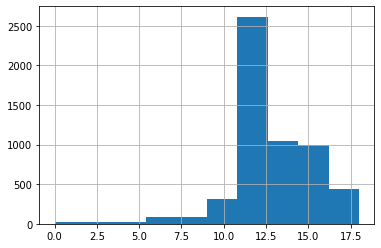

In [208]:
# a) Elaborar plotar o histograma e o boxplot da variável “educ”.
df.educ.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x129c279a0>,
 'caps': [<matplotlib.lines.Line2D at 0x129c33070>,
 'boxes': [<matplotlib.lines.Line2D at 0x129c27640>],
 'medians': [<matplotlib.lines.Line2D at 0x129c33730>],
 'fliers': [<matplotlib.lines.Line2D at 0x129c33a90>],
 'means': []}

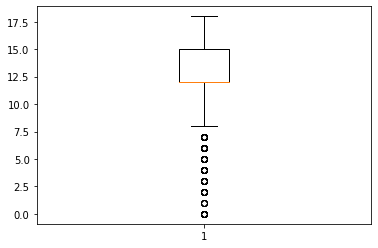

In [209]:
plt.boxplot(df.educ)

In [210]:
# b) Elaborar a tabela de distribuição de frequências da variável “earns” (rendimento da mulher);

# Separa uma cópia dos dados em uma lista particular para manipulaçnao
target_attribute = sorted(df.earns, reverse=True)
pre_table = {i+1:[] for i in range(int(k(target_attribute)))}
num_samples = len(target_attribute)
labels = []

# Gambiarra pra ividir as classes
l_i = target_attribute[0]
for i in range(int(k(target_attribute))):
    try:  # mcgyver
        l_s = l_i + ac(target_attribute)
    except:
        break
    labels.append(f'|{l_i}---{l_s}')
    for attribute in target_attribute:
        if attribute < l_s:
            pre_table[i+1].append(target_attribute.pop(target_attribute.index(attribute)))
    try:
        l_i = l_i + ac(target_attribute)
    except:
        break

        # Se sobrar alguma coisa colocar na última classe
for leftovers in target_attribute:
    pre_table[max(pre_table.keys())].append(leftovers)

pre_table = {k:v for k, v in pre_table.items() if v}  # eliminar qualquer chave vazia

In [211]:
# Monta a tabela de frequências
frequencies = {
    'fi': [len(v) for v in pre_table.values()],  # Frequência absoluta
    'fr': [len(v) / num_samples for v in pre_table.values()],  # Frequeência relativa
    'f%': [(len(v) / num_samples) * 100 for v in pre_table.values()],  # Frequência percentual
    'fac': [fac(v) for v in pre_table.values()],  # Frequência acumulada
    'xi': [xi(v) for v in pre_table.values()]  # ponto médio
}

# Exibe a tabela
pd.DataFrame(frequencies, index=labels)

,fi,fr,f%,fac,xi
|2884.5---2922.96,2817,0.500000,50.000000,656427.0,1442.25
|2938.9245283018868---2993.3490566037735,1409,0.250089,25.008875,328118.5,1442.25
|3016.8839877613464---3094.843447220806,704,0.124956,12.495563,164597.5,1442.25
|3082.7301416075---3148.576295453654,352,0.062478,6.247781,81814.0,856.00
|3157.507919385278---3232.285697163056,176,0.031239,3.123891,40786.0,673.00
|3248.430996308355---3339.3540732314323,88,0.015619,1.561945,20298.0,591.00
|3359.5421074194664---3470.6532185305778,44,0.007810,0.780973,10129.0,500.00
|3506.208774086133---3652.8754407527995,22,0.003905,0.390486,5065.0,440.00
|3688.958774086133---3871.708774086133,11,0.001952,0.195243,2486.0,365.50
|3888.958774086133---4088.958774086133,6,0.001065,0.106496,1174.0,300.00


<AxesSubplot:>

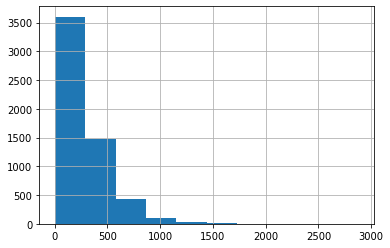

In [212]:
# c: - Elaborar e plotar o histograma da variável “earns”;
df.earns.hist()

In [225]:
# d: - Para a variável "earns", calcular os seguintes indicadores:
# - média; - mediana; - moda; - variância; - desvio padrão;
# - CV–Coeficiente de Variação; - Quartis; - distância interquartílica; - percentis.
results = {
    'mean': mean(df.earns),
    'median': sorted(df.earns)[median(df.earns)],
    'mode': mode(list(df.earns)),
    'variance': variance(df.earns),
    'std deviation': std_deviation(df.earns),
    'cv': variance_coef(df.earns),
    'q1': sorted(df.earns)[get_q1(df.earns)],
    'q2': sorted(df.earns)[get_q2(df.earns)],
    'q3': sorted(df.earns)[get_q3(df.earns)],
    'dist. interqualitica': results['q3'] - results['q1'],
}

for key, value in results.items():
    print(f'{key.upper()}: {value}')

print('Percentiles:')
earns_percentiles = percentiles(df.earns)
print('\t'.join(f'{key}%' for key in earns_percentiles.keys()))
print('\t'.join(f'{value}' for value in earns_percentiles.values()))

MEAN: 232.8329783457579
MEDIAN: 185.0
MODE: 0.0
VARIANCE: 69328.51949461219
STD DEVIATION: 263.30309435062134
CV: 1.1308668394887564
Q1: 0.0
Q2: 185.0
Q3: 380.0
DIST. INTERQUALITICA: 380.0
Percentiles:
10%	20%	30%	40%	50%	60%	70%	80%	90%
0.0	0.0	0.0	80.0	180.0	252.0	329.0	420.0	560.0
